In [38]:
import anvil.server

In [39]:
anvil.server.connect("server_5HDCWUB7UA7CYPL6EUVWETLM-F3IOMN3YTHN4CJS4")

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [41]:
data_true = pd. read_csv('True.csv')
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [42]:
data_fake = pd.read_csv("Data_fake.csv")
data_fake.head()
data_fake = data_fake.dropna(axis = 1)
data_fake

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
23477,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23478,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23479,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23480,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [43]:
data_true ['class'] = 1
data_fake ['class'] = 0
data_fake

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
23477,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23478,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23479,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23480,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [44]:
data_fake.shape, data_true.shape

((23482, 3), (21417, 5))

In [45]:
data_fake_manual_testing = data_fake.tail (10)
for i in range (23480,23470, -1):
  data_fake.drop ([i], axis = 0, inplace = True)

data_true_manual_testing = data_true.tail (10)
for i in range (21416, 21406, -1):
  data_true.drop ([i], axis = 0, inplace=True)

In [46]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [47]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge#displaying first 10 values after above operation

,title,text,class,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,NaN,NaN
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1,worldnews,"August 22, 2017"
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,1,worldnews,"August 21, 2017"
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,1,worldnews,"August 22, 2017"
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,1,worldnews,"August 22, 2017"


subject
politicsNews    11272
worldnews       10135
Name: text, dtype: int64


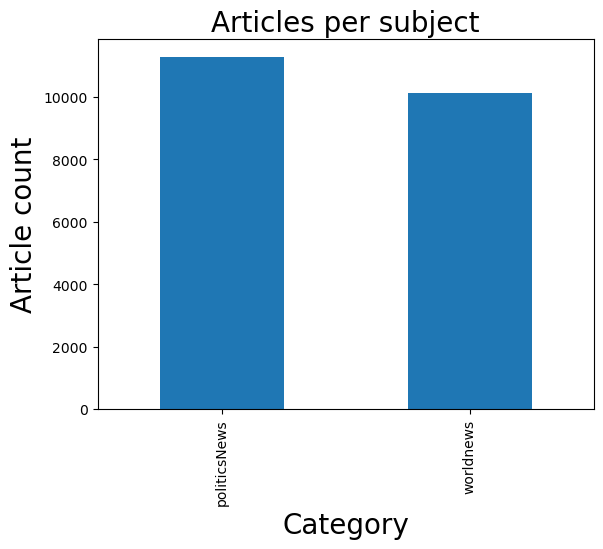

In [48]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23472
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


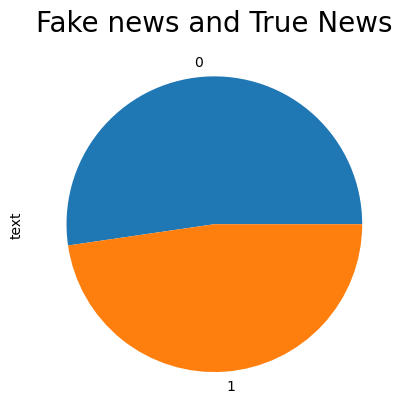

In [49]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [50]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset 

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [51]:
data=data.sample(frac=1)
data.head(10)

,text,class
13351,"We can t be certain, but it almost looked like...",0
18870,WATCH: Susan Rice insists I leaked nothing to...,0
7082,(Reuters) - Britain’s Sir Elton John will not ...,1
18684,Freedom is not a gift from government. It is ...,0
4278,There may be trouble in paradise amid the folk...,0
15401,MOSCOW (Reuters) - A meeting between Russian P...,1
17333,BERLIN/HANOVER (Reuters) - Germany s Social De...,1
15774,(Reuters) - Four Rohingya Muslims died this we...,1
381,"Robert Ritchie, AKA Kid Rock, has shown quite ...",0
5069,Court documents show deceptive behavior by Don...,0


In [52]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [53]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [54]:
def wordopt (text):
  text = text.lower()
  text = re.sub ('\[.*?\]','',text)
  text= re.sub("\\W", " ", text)
  text = re.sub('https?://\S+ | www\.\S+','', text)
  text = re.sub ('<.*?>+','', text)
  text = re.sub ('[%s] ' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\ w*\d\w*', '', text)
  return text

In [55]:
data["class"].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
21402    1
21403    1
21404    1
21405    1
21406    1
Name: class, Length: 44879, dtype: int32

In [56]:
x = data['text']
y = data['class']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25,random_state=0)

In [58]:
from sklearn. feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization. transform(x_test)

In [59]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [60]:
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)
print(classification_report (y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5883
           1       0.99      0.99      0.99      5337

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5806   77]
 [  64 5273]]


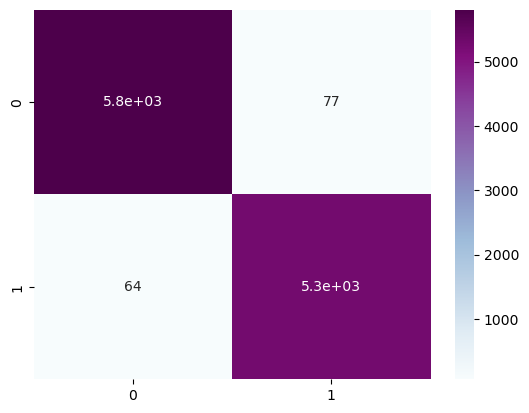

In [61]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,pred_lr);
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True);

In [62]:
print("xv_train:", xv_train)
print("y_train:", y_train)

xv_train:   (0, 103804)	0.020761294344290134
  (0, 51943)	0.04214720590126523
  (0, 71702)	0.03320959694790974
  (0, 86627)	0.032465589395328474
  (0, 104278)	0.017324251633067285
  (0, 105340)	0.02406108749866218
  (0, 31193)	0.022406035002313154
  (0, 48722)	0.029081337224311877
  (0, 29070)	0.03783908957123664
  (0, 75924)	0.026193551089691097
  (0, 48504)	0.04691611516281733
  (0, 81820)	0.029384642563460583
  (0, 102646)	0.03397652255093144
  (0, 82494)	0.021510720445452564
  (0, 47095)	0.024481718110561504
  (0, 96098)	0.01932142973041768
  (0, 24033)	0.03855740711368921
  (0, 50209)	0.03151668711215006
  (0, 36984)	0.01997543322923586
  (0, 91524)	0.014386195508880246
  (0, 100003)	0.017070162362183585
  (0, 26222)	0.06269095709667494
  (0, 90619)	0.03126409171840107
  (0, 20569)	0.05504675158053893
  (0, 14762)	0.026882627793760844
  :	:
  (33658, 14654)	0.02429722764769753
  (33658, 44457)	0.01208506036283019
  (33658, 42823)	0.024354192692136924
  (33658, 39407)	0.06097230369

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [64]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)
train_accuracy = RFC.score(xv_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9999702902641195


In [65]:
score1 = RFC.score(xv_test, y_test)
print("Score 1:", score1)

Score 1: 0.988680926916221


In [66]:
pred_RFC = RFC.predict(xv_test)

In [67]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5883
           1       0.99      0.99      0.99      5337

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5823   60]
 [  67 5270]]


<Axes: >

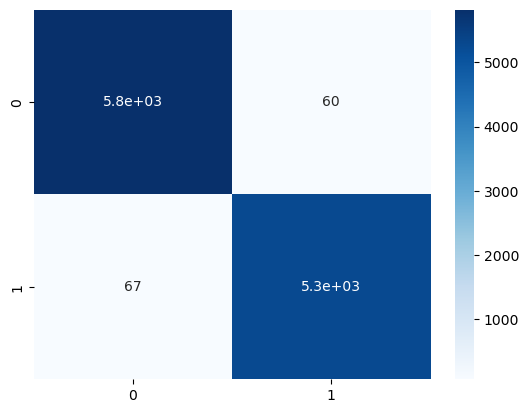

In [68]:
cm= confusion_matrix(y_test,pred_RFC)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

In [69]:
import anvil.server

# Reconnect to the Anvil Uplink server
anvil.server.connect("server_5HDCWUB7UA7CYPL6EUVWETLM-F3IOMN3YTHN4CJS4")



In [70]:
def output_label(classification):
    if classification == 0:
        return "FAKE News"
    elif classification == 1:
        return "TRUE News"
    else:
        return "Unknown"

@anvil.server.callable
def predict_news(news_article):
    testing_news = {"text": [news_article]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = LR.predict(new_xv_test)
    pred_rfc = RFC.predict(new_xv_test)

    lr_classification = pred_lr[0]
    rfc_classification = pred_rfc[0]
    
    lr_output = output_label(lr_classification)
    rfc_output = output_label(rfc_classification)

    return {
        "LR Prediction": {
            "Classification": lr_classification,
            "Label": lr_output
        },
        "RFC Prediction": {
            "Classification": rfc_classification,
            "Label": rfc_output
        }
    }
